<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2023/24 Semester</h3></th>
    </tr>
</table>

In [ ]:
# Import the Required Packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, LearningRateScheduler

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import os
from PIL import Image
import math

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
!ls "/content/drive/My Drive/"
base_dir = "/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Images"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

Mounted at /content/drive
'Ngee Ann Poly'  'Udemy Courses'


In [ ]:
img_size = 224

model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model_1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(10, activation='softmax'))

### Finalised Model Architecture and Hyperparameters

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                   

In [ ]:
model_1.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0005),
    metrics=['acc']
)

In [ ]:
checkpoint_filepath = '/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 2/model_1.tf'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_acc',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=25,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [ ]:
history = model_1.fit(
    train_generator,
    steps_per_epoch=300,
    epochs = 80,
    validation_data=validation_generator,
    validation_steps=80,
    callbacks=[model_checkpoint],
    verbose=1
)

Epoch 1/80
300/300 [==============================] - ETA: 0s - loss: 2.1100 - acc: 0.2197 
Epoch 1: val_acc improved from -inf to 0.31650, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 2/model_1.tf
300/300 [==============================] - 4319s 14s/step - loss: 2.1100 - acc: 0.2197 - val_loss: 1.8699 - val_acc: 0.3165
Epoch 2/80
300/300 [==============================] - ETA: 0s - loss: 1.8785 - acc: 0.3229
Epoch 2: val_acc improved from 0.31650 to 0.34200, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 2/model_1.tf
300/300 [==============================] - 104s 347ms/step - loss: 1.8785 - acc: 0.3229 - val_loss: 1.7856 - val_acc: 0.3420
Epoch 3/80
300/300 [==============================] - ETA: 0s - loss: 1.7690 - acc: 0.3525
Epoch 3: val_acc improved from 0.34200 to 0.39750, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 2/model_1.tf
300/300 [==============================

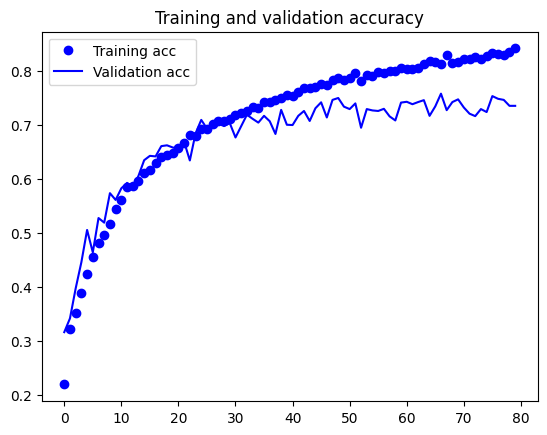

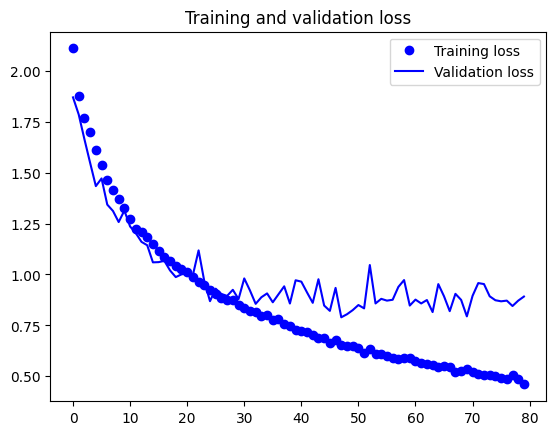

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_1 = keras.models.load_model('/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 2/model_1.tf')

evaluation_results = model_1.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

20/20 [==============================] - 238s 13s/step - loss: 0.8409 - acc: 0.7520
Test Loss: 0.840865433216095
Test Accuracy: 0.7519999742507935


In [ ]:
x_test = []
y_test = []

class_labels = {'beet_salad': 0, 'beignets': 1, 'ceviche': 2, 'chocolate_mousse': 3, 'cup_cakes': 4,
                'greek_salad': 5, 'grilled_salmon': 6, 'pancakes': 7, 'panna_cotta': 8, 'spaghetti_bolognese': 9}

for class_folder in sorted(os.listdir(test_dir)):
    class_folder_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_folder_path):
        class_label = class_labels[class_folder]

        for image_file in sorted(os.listdir(class_folder_path)):
            image_path = os.path.join(class_folder_path, image_file)
            img = Image.open(image_path)
            img = img.resize((224, 224))
            img_array = np.array(img)
            x_test.append(img_array)
            y_test.append(class_label)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.astype('float32') / 255.0

In [ ]:
predictions = model_1.predict(x_test)
predicted_labels = np.argmax(predictions, axis= 1)
true_labels = test_generator.classes

class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(class_report)

16/16 [==============================] - 2s 70ms/step
Classification Report:
                     precision    recall  f1-score   support

         beet_salad       0.85      0.68      0.76        50
           beignets       0.90      0.70      0.79        50
            ceviche       0.68      0.80      0.73        50
   chocolate_mousse       0.67      0.52      0.58        50
          cup_cakes       0.56      0.78      0.65        50
        greek_salad       0.76      0.78      0.77        50
     grilled_salmon       0.76      0.74      0.75        50
           pancakes       0.76      0.78      0.77        50
        panna_cotta       0.73      0.70      0.71        50
spaghetti_bolognese       0.89      0.96      0.92        50

           accuracy                           0.74       500
          macro avg       0.76      0.74      0.74       500
       weighted avg       0.76      0.74      0.74       500



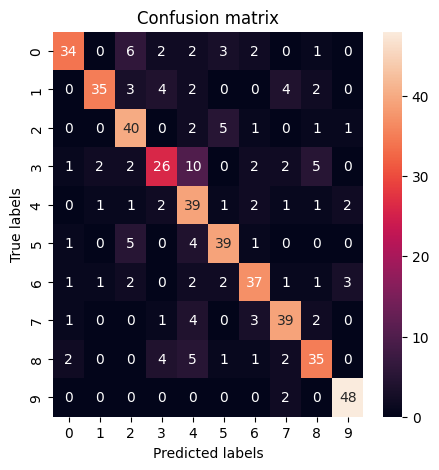

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [ ]:
# Load the food list (in alphabetical order)
with open('/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/18.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beet_salad', 'beignets', 'ceviche', 'chocolate_mousse', 'cup_cakes', 'greek_salad', 'grilled_salmon', 'pancakes', 'panna_cotta', 'spaghetti_bolognese']


In [ ]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

In [ ]:
online_images_dir = '/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Online Images'
image_files = os.listdir(online_images_dir)

for image_file in image_files:
    img_path = os.path.join(online_images_dir, image_file)
    plt.imshow(plt.imread(img_path))
    plt.show()

    img_array = image_process(img_path)
    prob_df, result = prediction(model_1, img_array, food_list)

    print(f'\nImage: {image_file}')
    print('The prediction is:', result, '\n\n', prob_df)
    print('-' * 40)

In [ ]:
num_images = len(image_files)
images_per_row = 3
num_rows = (num_images + images_per_row - 1) // images_per_row

fig, axes = plt.subplots(num_rows, images_per_row, figsize=(10, 3 * num_rows))

for i, image_file in enumerate(image_files):
    img_path = os.path.join(online_images_dir, image_file)
    ax = axes[i // images_per_row, i % images_per_row]
    ax.axis('off')
    raw_img = Image.open(img_path)
    display_img = raw_img.resize((150,150))
    img_array = image_process(img_path)
    prob_df, result = prediction(model_1, img_array, food_list)
    ax.imshow(display_img)
    ax.set_title(f"{result} [{image_file}]", fontsize=9)

if num_images % images_per_row != 0:
    for i in range(num_images % images_per_row, images_per_row):
        fig.delaxes(axes[num_rows - 1, i])

plt.tight_layout()
plt.show()

### Tested out Learning Rate Decay

In [ ]:
img_size = 224

model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model_2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                 

In [ ]:
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0005),
    metrics=['acc']
)

In [ ]:
def step_decay(epoch):
   initial_lrate = 0.0005
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,
           math.floor((1+epoch)/epochs_drop))
   return lrate

lrate = LearningRateScheduler(step_decay)

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []

    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(step_decay(len(self.losses)))

loss_history = LossHistory()

In [ ]:
checkpoint_filepath = '/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 2/model_2.tf'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_acc',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=25,
    class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [ ]:
history = model_2.fit(
    train_generator,
    steps_per_epoch=300,
    epochs = 80,
    validation_data=validation_generator,
    validation_steps=80,
    callbacks=[model_checkpoint, lrate, loss_history],
    verbose=1
)

Epoch 1/80
300/300 [==============================] - ETA: 0s - loss: 2.2208 - acc: 0.1676
Epoch 1: val_acc improved from -inf to 0.29250, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 2/model_2.tf
300/300 [==============================] - 100s 329ms/step - loss: 2.2208 - acc: 0.1676 - val_loss: 1.9887 - val_acc: 0.2925 - lr: 5.0000e-04
Epoch 2/80
300/300 [==============================] - ETA: 0s - loss: 1.9565 - acc: 0.2849
Epoch 2: val_acc improved from 0.29250 to 0.32300, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 2/model_2.tf
300/300 [==============================] - 100s 334ms/step - loss: 1.9565 - acc: 0.2849 - val_loss: 1.8447 - val_acc: 0.3230 - lr: 5.0000e-04
Epoch 3/80
300/300 [==============================] - ETA: 0s - loss: 1.8395 - acc: 0.3355
Epoch 3: val_acc improved from 0.32300 to 0.39500, saving model to /content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 2/model_2.tf
300/3

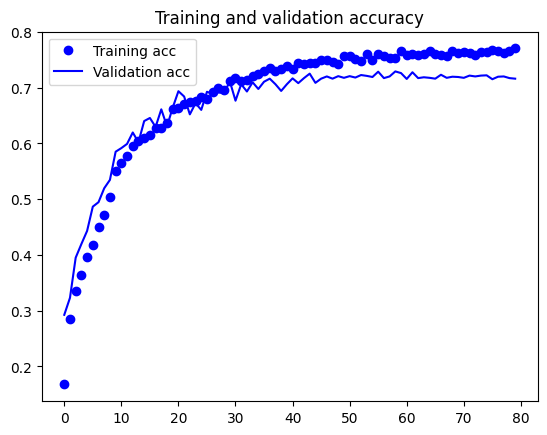

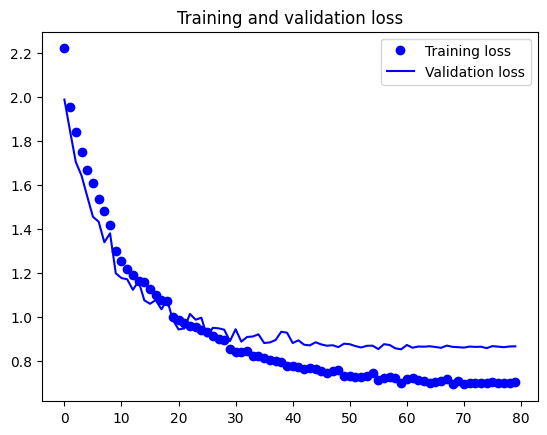

In [ ]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

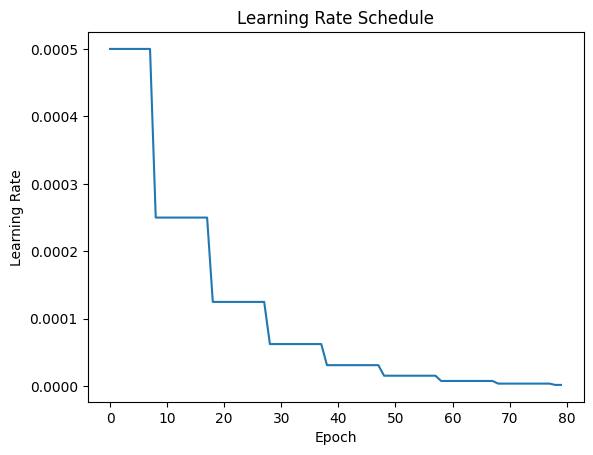

In [ ]:
plt.plot(range(len(loss_history.lr)), loss_history.lr)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()

In [ ]:
model_2 = keras.models.load_model('/content/drive/My Drive/Ngee Ann Poly/Deep Learning/ASG1/Code/Step 2/model_2.tf')

evaluation_results = model_2.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

20/20 [==============================] - 2s 81ms/step - loss: 0.9078 - acc: 0.7140
Test Loss: 0.9077628254890442
Test Accuracy: 0.7139999866485596


In [ ]:
predictions = model_2.predict(x_test)
predicted_labels = np.argmax(predictions, axis= 1)
true_labels = test_generator.classes

class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(class_report)

16/16 [==============================] - 1s 35ms/step
Classification Report:
                     precision    recall  f1-score   support

         beet_salad       0.68      0.78      0.73        50
           beignets       0.87      0.80      0.83        50
            ceviche       0.83      0.60      0.70        50
   chocolate_mousse       0.55      0.58      0.56        50
          cup_cakes       0.59      0.66      0.62        50
        greek_salad       0.72      0.78      0.75        50
     grilled_salmon       0.69      0.76      0.72        50
           pancakes       0.78      0.76      0.77        50
        panna_cotta       0.63      0.52      0.57        50
spaghetti_bolognese       0.87      0.92      0.89        50

           accuracy                           0.72       500
          macro avg       0.72      0.72      0.72       500
       weighted avg       0.72      0.72      0.72       500



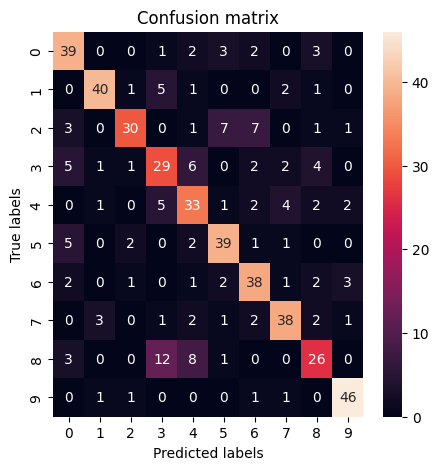

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

## Other models that I ran that has different hyperparameters and architectures

### Trial 1

In [ ]:
### BASELINE MODEL WITH DATA AUGMENTATION

# Optimizer is RMSProp
# Learning Rate is 1e-4
# Batch Size = 20

# img_size = 224

# model_1 = models.Sequential()
# model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model_1.add(layers.MaxPooling2D((2, 2)))
# model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_1.add(layers.MaxPooling2D((2, 2)))
# model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_1.add(layers.MaxPooling2D((2, 2)))
# model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_1.add(layers.MaxPooling2D((2, 2)))
# model_1.add(layers.Flatten())
# model_1.add(layers.Dense(512, activation='relu'))
# model_1.add(layers.Dense(10, activation='softmax'))


# Model: "sequential"
# _________________________________________________________________
#  Layer (type)                    Output Shape              Param #
# =================================================================
#  conv2d_4 (Conv2D)               (None, 222, 222, 32)      896
#  max_pooling2d_4 (MaxPooling2D)  (None, 111, 111, 32)      0
#  conv2d_5 (Conv2D)               (None, 109, 109, 64)      18496
#  max_pooling2d_5 (MaxPooling2D)  (None, 54, 54, 64)        0
#  conv2d_6 (Conv2D)               (None, 52, 52, 128)       73856
#  max_pooling2d_6 (MaxPooling2D)  (None, 26, 26, 128)       0
#  conv2d_7 (Conv2D)               (None, 24, 24, 128)       147584
#  max_pooling2d_7 (MaxPooling2D)  (None, 12, 12, 128)       0
#  flatten_1 (Flatten)             (None, 18432)             0
#  dense_2 (Dense)                 (None, 512)               9437696
#  dense_3 (Dense)                 (None, 10)                5130

# =================================================================
# Total params: 9683658 (36.94 MB)
# Trainable params: 9683658 (36.94 MB)
# Non-trainable params: 0 (0.00 Byte)
# _________________________________________________________________


# Best Validation Loss: 0.9853
# Best Validation Accuracy: 0.7240

# Test Loss: 1.1244653463363647
# Test Accuracy: 0.7139999866485596


# Classification Report:
#                      precision    recall  f1-score   support

#          beet_salad       0.84      0.74      0.79        50
#            beignets       0.85      0.80      0.82        50
#             ceviche       0.65      0.78      0.71        50
#    chocolate_mousse       0.57      0.56      0.57        50
#           cup_cakes       0.64      0.70      0.67        50
#         greek_salad       0.84      0.76      0.80        50
#      grilled_salmon       0.75      0.66      0.70        50
#            pancakes       0.78      0.86      0.82        50
#         panna_cotta       0.60      0.56      0.58        50
# spaghetti_bolognese       0.87      0.94      0.90        50

#            accuracy                           0.74       500
#           macro avg       0.74      0.74      0.74       500
#        weighted avg       0.74      0.74      0.74       500

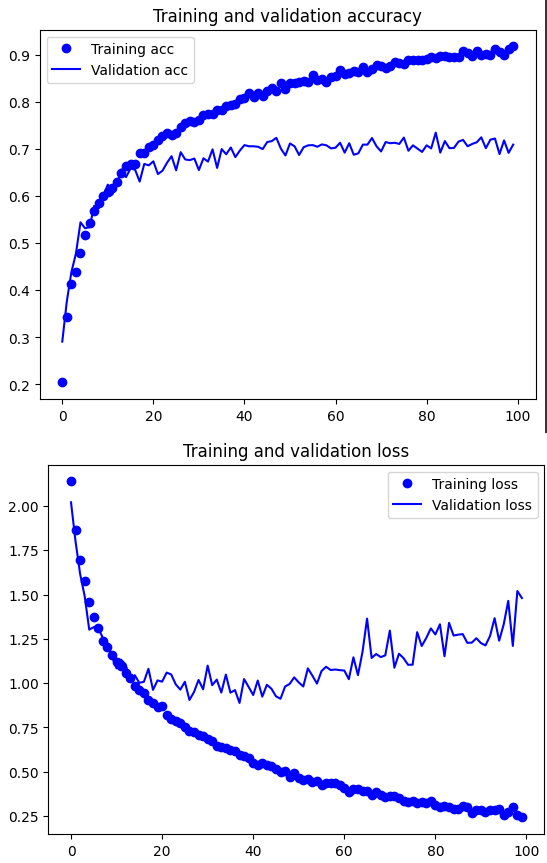

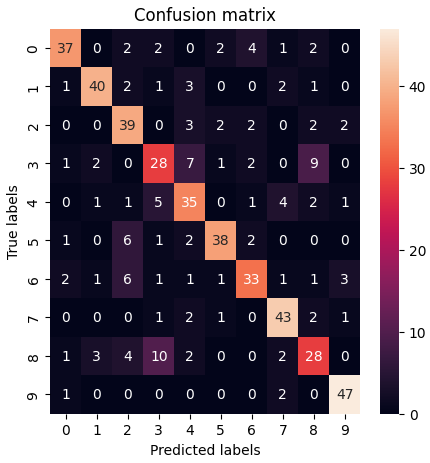

Image: spaghetti bolognese2.jpg
The prediction is: spaghetti_bolognese

Image: spaghetti bolognese1.jpg
The prediction is: spaghetti_bolognese

Image: pancake1.jpg
The prediction is: pancakes

Image: chocolate mousse1.jpg
The prediction is: beignets

Image: chocolate mousse2.jpg
The prediction is: chocolate_mousse

Image: beignets1.jpg
The prediction is: beignets

Image: beignets2.jpg
The prediction is: grilled_salmon

Image: beetsalad1.jpg
The prediction is: beet_salad

Image: ceviche1.jpg
The prediction is: ceviche

Image: grilled salmon1.jpg
The prediction is: grilled_salmon

Image: beignets3.jpg
The prediction is: beignets

Image: donald trump.jpg
The prediction is: beignets

Image: person1.jpg
The prediction is: grilled_salmon

Image: person2.png
The prediction is: chocolate_mousse



### Trial 2

In [ ]:
### REMOVED THE DENSE LAYER

# Optimizer is Adam
# Learning Rate is 0.0005
# Batch Size = 25

# img_size = 224

# model_2 = models.Sequential()
# model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model_2.add(layers.MaxPooling2D((2, 2)))
# model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_2.add(layers.MaxPooling2D((2, 2)))
# model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_2.add(layers.MaxPooling2D((2, 2)))
# model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_2.add(layers.MaxPooling2D((2, 2)))
# model_2.add(layers.Flatten())
# model_2.add(layers.Dense(10, activation='softmax'))


# Model: "sequential"
# _________________________________________________________________
#  Layer (type)                     Output Shape              Param #
# =================================================================
#  conv2d_4 (Conv2D)               (None, 222, 222, 32)      896
#  max_pooling2d_4 (MaxPooling2D)  (None, 111, 111, 32)      0
#  conv2d_5 (Conv2D)               (None, 109, 109, 64)      18496
#  max_pooling2d_5 (MaxPooling2D)  (None, 54, 54, 64)        0
#  conv2d_6 (Conv2D)               (None, 52, 52, 128)       73856
#  max_pooling2d_6 (MaxPooling2D)  (None, 26, 26, 128)       0
#  conv2d_7 (Conv2D)               (None, 24, 24, 128)       147584
#  max_pooling2d_7 (MaxPooling2D)  (None, 12, 12, 128)       0
#  flatten_1 (Flatten)             (None, 18432)             0
#  dense_1 (Dense)                 (None, 10)                184330

# =================================================================
# Total params: 425162 (1.62 MB)
# Trainable params: 425162 (1.62 MB)
# Non-trainable params: 0 (0.00 Byte)
# _________________________________________________________________

# Best Validation Loss: 0.9483
# Best Validation Accuracy: 0.7612
                 
# Test Loss: 0.9661444425582886      
# Test Accuracy: 0.75                 

# Classification Report:
#                      precision    recall  f1-score   support

#          beet_salad       0.70      0.80      0.75        50
#            beignets       0.88      0.84      0.86        50
#             ceviche       0.90      0.70      0.79        50
#    chocolate_mousse       0.55      0.60      0.57        50
#           cup_cakes       0.74      0.70      0.72        50
#         greek_salad       0.72      0.92      0.81        50
#      grilled_salmon       0.76      0.70      0.73        50
#            pancakes       0.82      0.74      0.78        50
#         panna_cotta       0.63      0.62      0.63        50
# spaghetti_bolognese       0.88      0.88      0.88        50

#            accuracy                           0.75       500
#           macro avg       0.76      0.75      0.75       500
#        weighted avg       0.76      0.75      0.75       500


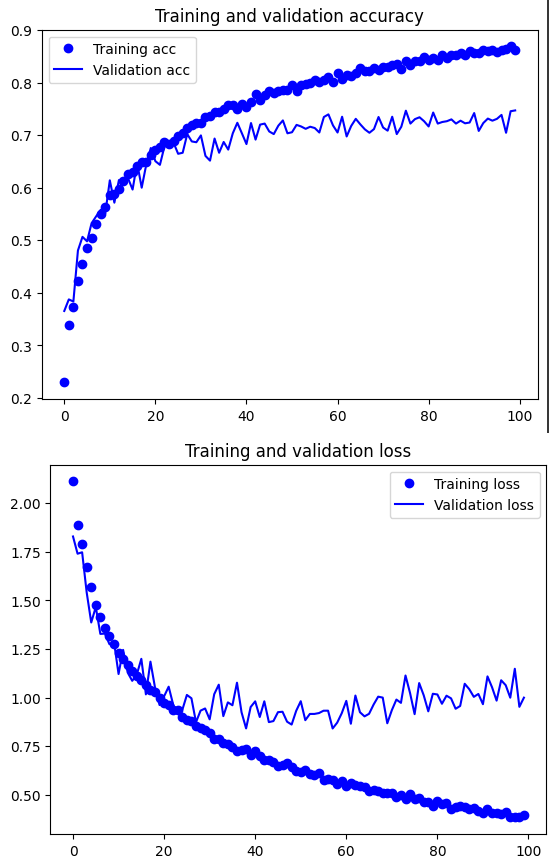

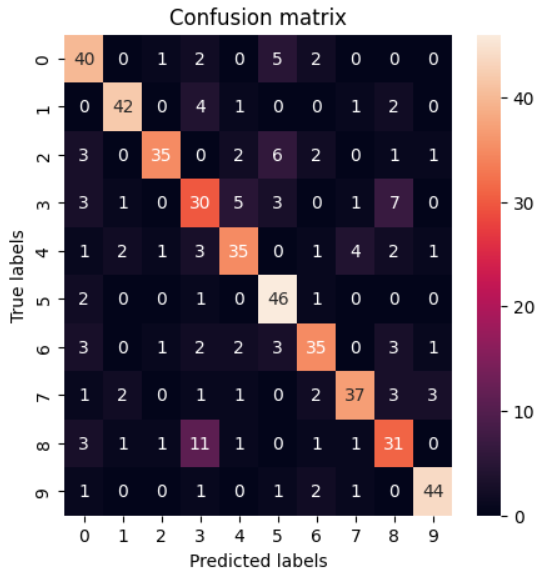

Image: spaghetti bolognese2.jpg
The prediction is: chocolate_mousse

Image: spaghetti bolognese1.jpg
The prediction is: spaghetti_bolognese

Image: pancake1.jpg
The prediction is: pancakes

Image: chocolate mousse1.jpg
The prediction is: chocolate_mousse

Image: chocolate mousse2.jpg
The prediction is: chocolate_mousse

Image: beignets1.jpg
The prediction is: beignets

Image: beignets2.jpg
The prediction is: beignets

Image: beetsalad1.jpg
The prediction is: beet_salad

Image: ceviche1.jpg
The prediction is: ceviche

Image: grilled salmon1.jpg
The prediction is: grilled_salmon

Image: beignets3.jpg
The prediction is: beignets

Image: donald trump.jpg
The prediction is: cup_cakes

Image: person1.jpg
The prediction is: ceviche

Image: person2.png
The prediction is: chocolate_mousse


### Trial 3

In [ ]:
### INCREASE THE BATCH SIZE TO FROM 25 TO 50 TO SEE IF IT IMPROVES

# Optimizer is Adam
# Learning Rate is 0.0005
# Batch Size = 50

# img_size = 224

# model_3 = models.Sequential()
# model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model_3.add(layers.MaxPooling2D((2, 2)))
# model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_3.add(layers.MaxPooling2D((2, 2)))
# model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_3.add(layers.MaxPooling2D((2, 2)))
# model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_3.add(layers.MaxPooling2D((2, 2)))
# model_3.add(layers.Flatten())
# model_3.add(layers.Dense(10, activation='softmax'))


# Model: "sequential"
# _________________________________________________________________
#  Layer (type)                     Output Shape              Param #
# =================================================================
#  conv2d_4 (Conv2D)               (None, 222, 222, 32)      896
#  max_pooling2d_4 (MaxPooling2D)  (None, 111, 111, 32)      0
#  conv2d_5 (Conv2D)               (None, 109, 109, 64)      18496
#  max_pooling2d_5 (MaxPooling2D)  (None, 54, 54, 64)        0
#  conv2d_6 (Conv2D)               (None, 52, 52, 128)       73856
#  max_pooling2d_6 (MaxPooling2D)  (None, 26, 26, 128)       0
#  conv2d_7 (Conv2D)               (None, 24, 24, 128)       147584
#  max_pooling2d_7 (MaxPooling2D)  (None, 12, 12, 128)       0
#  flatten_1 (Flatten)             (None, 18432)             0
#  dense_1 (Dense)                 (None, 10)                184330

# =================================================================
# Total params: 425162 (1.62 MB)
# Trainable params: 425162 (1.62 MB)
# Non-trainable params: 0 (0.00 Byte)
# _________________________________________________________________

# Best Validation Loss: 0.8769
# Best Validation Accuracy: 0.7572

# Test Loss: 0.8769739270210266
# Test Accuracy: 0.7400000095367432

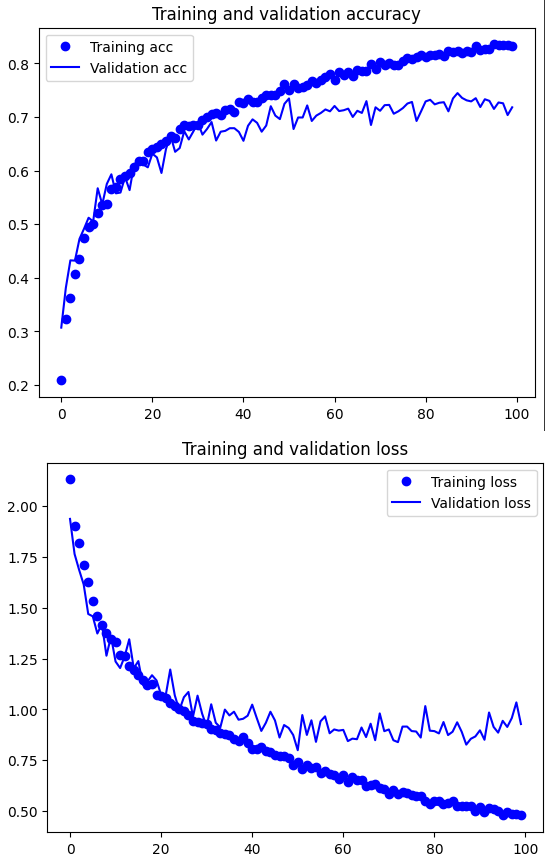

Image: spaghetti bolognese2.jpg
The prediction is: spaghetti_bolognese

Image: spaghetti bolognese1.jpg
The prediction is: spaghetti_bolognese

Image: pancake1.jpg
The prediction is: pancakes

Image: chocolate mousse1.jpg
The prediction is: chocolate_mousse

Image: chocolate mousse2.jpg
The prediction is: chocolate_mousse

Image: beignets1.jpg
The prediction is: beignets

Image: beignets2.jpg
The prediction is: beignets

Image: beetsalad1.jpg
The prediction is: beet_salad

Image: ceviche1.jpg
The prediction is: ceviche

Image: grilled salmon1.jpg
The prediction is: grilled_salmon

Image: beignets3.jpg
The prediction is: panna_cotta
    
Image: donald trump.jpg
The prediction is: chocolate_mousse

Image: person1.jpg
The prediction is: ceviche  

Image: person2.png
The prediction is: chocolate_mousse

### Trial 4

In [ ]:
### ADDED ADDITIONAL CONV LAYERS

# Optimizer is Adam
# Learning Rate is 0.0005
# Batch Size = 25

# img_size = 224

# model_4 = models.Sequential()
# model_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model_4.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model_4.add(layers.MaxPooling2D((2, 2)))
# model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_4.add(layers.MaxPooling2D((2, 2)))
# model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_4.add(layers.MaxPooling2D((2, 2)))
# model_4.add(layers.Flatten())
# model_4.add(layers.Dense(10, activation='softmax'))

# Model: "sequential"
# _________________________________________________________________
#  Layer (type)                    Output Shape              Param #
# =================================================================
#  conv2d (Conv2D)                 (None, 222, 222, 32)      896
#  conv2d_1 (Conv2D)               (None, 220, 220, 32)      9248
#  max_pooling2d (MaxPooling2D)    (None, 110, 110, 32)      0
#  conv2d_2 (Conv2D)               (None, 108, 108, 64)      18496
#  conv2d_3 (Conv2D)               (None, 106, 106, 64)      36928
#  max_pooling2d_1 (MaxPooling2D)  (None, 53, 53, 64)        0
#  conv2d_4 (Conv2D)               (None, 51, 51, 128)       73856
#  conv2d_5 (Conv2D)               (None, 49, 49, 128)       147584
#  max_pooling2d_2 (MaxPooling2D)  (None, 24, 24, 128)       0
#  flatten (Flatten)               (None, 73728)             0
#  dense (Dense)                   (None, 10)                737290

# =================================================================
# Total params: 1024298 (3.91 MB)
# Trainable params: 1024298 (3.91 MB)
# Non-trainable params: 0 (0.00 Byte)
# _________________________________________________________________

# Best Validation Loss: 0.7620
# Best Validation Accuracy: 0.7712

# Test Loss: 0.7998452186584473            
# Test Accuracy: 0.7519999742507935        

# Classification Report:
#                      precision    recall  f1-score   support

#          beet_salad       0.84      0.82      0.83        50
#            beignets       0.83      0.80      0.82        50
#             ceviche       0.71      0.68      0.69        50
#    chocolate_mousse       0.61      0.46      0.52        50
#           cup_cakes       0.67      0.78      0.72        50
#         greek_salad       0.76      0.82      0.79        50
#      grilled_salmon       0.84      0.76      0.80        50
#            pancakes       0.83      0.80      0.82        50
#         panna_cotta       0.62      0.74      0.67        50
# spaghetti_bolognese       0.90      0.94      0.92        50

#            accuracy                           0.76       500
#           macro avg       0.76      0.76      0.76       500
#        weighted avg       0.76      0.76      0.76       500

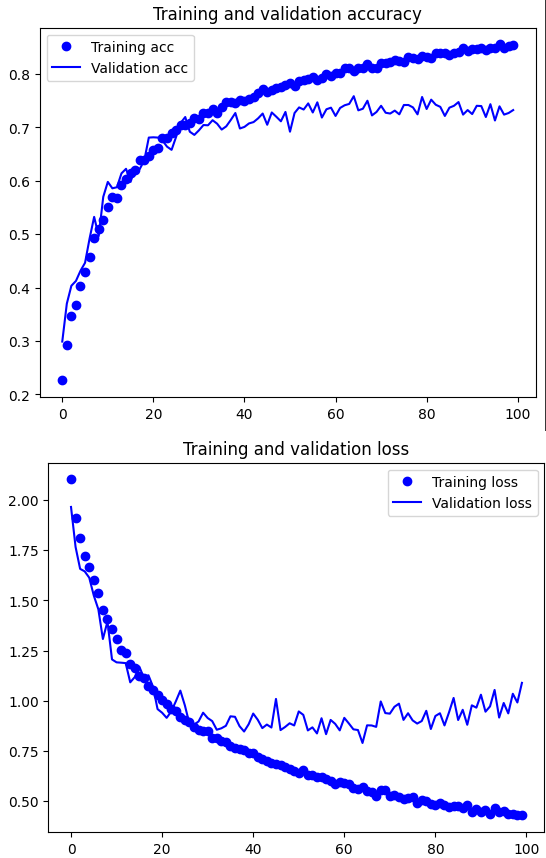

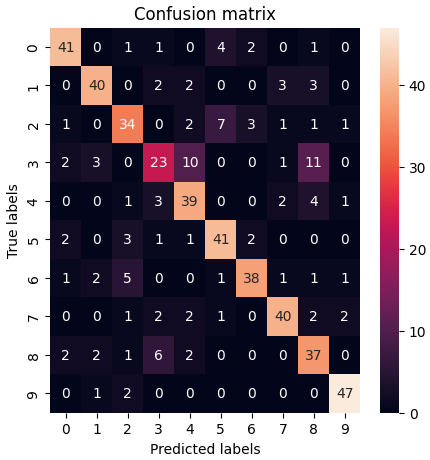


Image: spaghetti bolognese2.jpg
The prediction is: spaghetti_bolognese

Image: spaghetti bolognese1.jpg
The prediction is: spaghetti_bolognese

Image: pancake1.jpg
The prediction is: pancakes

Image: chocolate mousse1.jpg
The prediction is: chocolate_mousse

Image: chocolate mousse2.jpg
The prediction is: chocolate_mousse

Image: beignets1.jpg
The prediction is: beignets

Image: beignets2.jpg
The prediction is: ceviche

Image: beetsalad1.jpg
The prediction is: beet_salad

Image: ceviche1.jpg
The prediction is: ceviche

Image: grilled salmon1.jpg
The prediction is: grilled_salmon

Image: beignets3.jpg
The prediction is: beignets

Image: donald trump.jpg
The prediction is: chocolate_mousse

Image: person1.jpg
The prediction is: chocolate_mousse

Image: person2.png
The prediction is: chocolate_mousse



### Trial 5

In [ ]:
### ADDED 2 EXTRA 256 FILTERS ABOVE THAT

# Optimizer is Adam
# Learning Rate is 0.0005
# Batch Size = 25

# img_size = 224

# model_5 = models.Sequential()
# model_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model_5.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model_5.add(layers.MaxPooling2D((2, 2)))
# model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_5.add(layers.MaxPooling2D((2, 2)))
# model_5.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_5.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_5.add(layers.MaxPooling2D((2, 2)))
# model_5.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model_5.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model_5.add(layers.MaxPooling2D((2, 2)))
# model_5.add(layers.Flatten())
# model_5.add(layers.Dense(10, activation='softmax'))


# Model: "sequential"
# _________________________________________________________________
#  Layer (type)                     Output Shape              Param #
# =================================================================
#  conv2d_36 (Conv2D)               (None, 222, 222, 32)      896
#  conv2d_37 (Conv2D)               (None, 220, 220, 32)      9248
#  max_pooling2d_18 (MaxPooling2D)  (None, 110, 110, 32)      0
#  conv2d_38 (Conv2D)               (None, 108, 108, 64)      18496
#  conv2d_39 (Conv2D)               (None, 106, 106, 64)      36928
#  max_pooling2d_19 (MaxPooling2D)  (None, 53, 53, 64)        0
#  conv2d_40 (Conv2D)               (None, 51, 51, 128)       73856
#  conv2d_41 (Conv2D)               (None, 49, 49, 128)       147584
#  max_pooling2d_20 (MaxPooling2D)  (None, 24, 24, 128)       0
#  conv2d_42 (Conv2D)               (None, 22, 22, 256)       295168
#  conv2d_43 (Conv2D)               (None, 20, 20, 256)       590080
#  max_pooling2d_21 (MaxPooling2D)  (None, 10, 10, 256)       0
#  flatten_5 (Flatten)              (None, 25600)             0
#  dense_5 (Dense)                  (None, 10)                256010

# =================================================================
# Total params: 1428266 (5.45 MB)
# Trainable params: 1428266 (5.45 MB)
# Non-trainable params: 0 (0.00 Byte)
# _________________________________________________________________

# Best Validation Loss: 0.9221
# Best Validation Accuracy: 0.7357

# Test Loss: 0.9317456483840942
# Test Accuracy: 0.7239999771118164

# Classification Report:
#                      precision    recall  f1-score   support

#          beet_salad       0.77      0.66      0.71        50
#            beignets       0.93      0.76      0.84        50
#             ceviche       0.61      0.76      0.68        50
#    chocolate_mousse       0.49      0.44      0.46        50
#           cup_cakes       0.65      0.74      0.69        50
#         greek_salad       0.63      0.84      0.72        50
#      grilled_salmon       0.76      0.50      0.60        50
#            pancakes       0.81      0.68      0.74        50
#         panna_cotta       0.54      0.60      0.57        50
# spaghetti_bolognese       0.85      0.92      0.88        50

#            accuracy                           0.69       500
#           macro avg       0.70      0.69      0.69       500
#        weighted avg       0.70      0.69      0.69       500

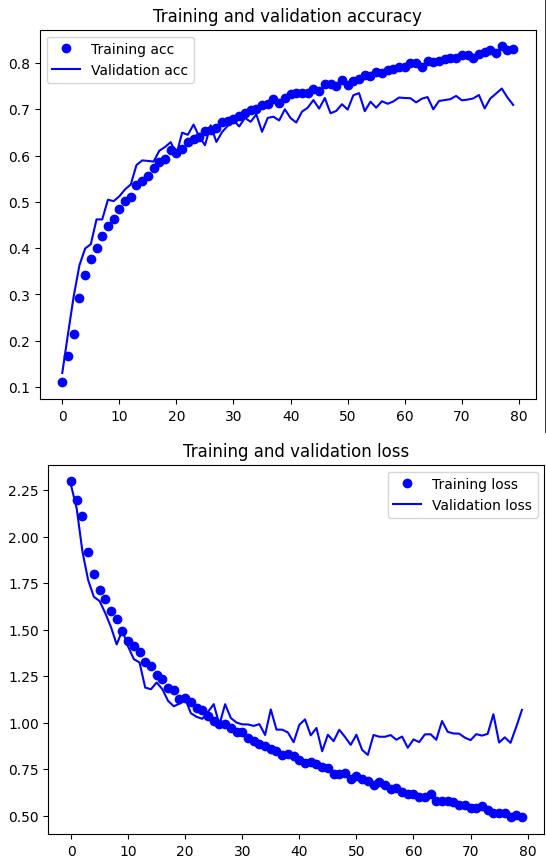

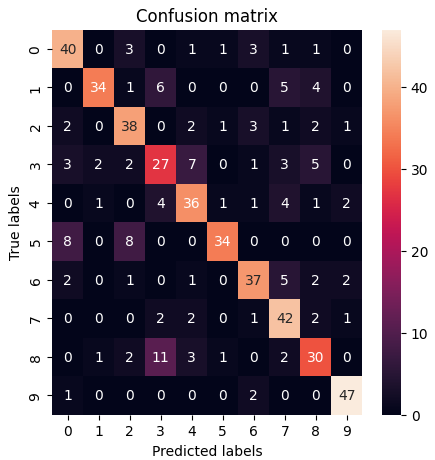

Image: spaghetti bolognese2.jpg
The prediction is: grilled_salmon

Image: spaghetti bolognese1.jpg
The prediction is: spaghetti_bolognese

Image: pancake1.jpg
The prediction is: pancakes

Image: chocolate mousse1.jpg
The prediction is: chocolate_mousse

Image: chocolate mousse2.jpg
The prediction is: chocolate_mousse

Image: beignets1.jpg
The prediction is: beignets

Image: beignets2.jpg
The prediction is: cup_cakes

Image: beetsalad1.jpg
The prediction is: beet_salad

Image: ceviche1.jpg
The prediction is: ceviche

Image: grilled salmon1.jpg
The prediction is: grilled_salmon

Image: beignets3.jpg
The prediction is: beignets

Image: donald trump.jpg
The prediction is: chocolate_mousse

Image: person1.jpg
The prediction is: chocolate_mousse

Image: person2.png
The prediction is: chocolate_mousse



### Trial 6

In [ ]:
### ADDED 1 512 FILTER ABOVE THE PREVIOUS MODEL 

# Optimizer is Adam
# Learning Rate is 0.0005
# Batch Size = 25

# img_size = 224

# model_6 = models.Sequential()
# model_6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model_6.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model_6.add(layers.MaxPooling2D((2, 2)))
# model_6.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_6.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_6.add(layers.MaxPooling2D((2, 2)))
# model_6.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_6.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_6.add(layers.MaxPooling2D((2, 2)))
# model_6.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model_6.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model_6.add(layers.MaxPooling2D((2, 2)))
# model_6.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model_6.add(layers.MaxPooling2D((2, 2)))
# model_6.add(layers.Flatten())
# model_6.add(layers.Dense(10, activation='softmax'))


# Model: "sequential"
# _________________________________________________________________
#  Layer (type)                    Output Shape              Param #   
# =================================================================
#  conv2d (Conv2D)                 (None, 222, 222, 32)      896                                                                       
#  conv2d_1 (Conv2D)               (None, 220, 220, 32)      9248                                                                     
#  max_pooling2d (MaxPooling2D)    (None, 110, 110, 32)      0                                                                                                                                     
#  conv2d_2 (Conv2D)               (None, 108, 108, 64)      18496                                                                    
#  conv2d_3 (Conv2D)               (None, 106, 106, 64)      36928                                                                    
#  max_pooling2d_1 (MaxPooling2D)  (None, 53, 53, 64)        0                                                                                                                                    
#  conv2d_4 (Conv2D)               (None, 51, 51, 128)       73856                                                                     
#  conv2d_5 (Conv2D)               (None, 49, 49, 128)       147584                                                                   
#  max_pooling2d_2 (MaxPooling2D)  (None, 24, 24, 128)       0                                                                                                                                   
#  conv2d_6 (Conv2D)               (None, 22, 22, 256)       295168                                                                   
#  conv2d_7 (Conv2D)               (None, 20, 20, 256)       590080                                                                 
#  max_pooling2d_3 (MaxPooling2D)  (None, 10, 10, 256)       0                                                                                                                                  
#  conv2d_8 (Conv2D)               (None, 8, 8, 512)         1180160                                                                  
#  max_pooling2d_4 (MaxPooling2D)  (None, 4, 4, 512)         0                                                                                                                       
#  flatten (Flatten)               (None, 8192)              0                                                                         
#  dense (Dense)                   (None, 10)                81930                                                                     
# =================================================================
# Total params: 2434346 (9.29 MB)
# Trainable params: 2434346 (9.29 MB)
# Non-trainable params: 0 (0.00 Byte)
# _________________________________________________________________


# Best Validation Loss: 0.9824
# Best Validation Accuracy: 0.7482

# Test Loss: 1.0219141244888306
# Test Accuracy: 0.7300000190734863

# Classification Report:
#                      precision    recall  f1-score   support

#          beet_salad       0.76      0.70      0.73        50
#            beignets       0.94      0.60      0.73        50
#             ceviche       0.77      0.68      0.72        50
#    chocolate_mousse       0.71      0.54      0.61        50
#           cup_cakes       0.60      0.76      0.67        50
#         greek_salad       0.71      0.80      0.75        50
#      grilled_salmon       0.80      0.72      0.76        50
#            pancakes       0.70      0.74      0.72        50
#         panna_cotta       0.57      0.72      0.64        50
# spaghetti_bolognese       0.80      0.96      0.87        50

#            accuracy                           0.72       500
#           macro avg       0.74      0.72      0.72       500
#        weighted avg       0.74      0.72      0.72       500

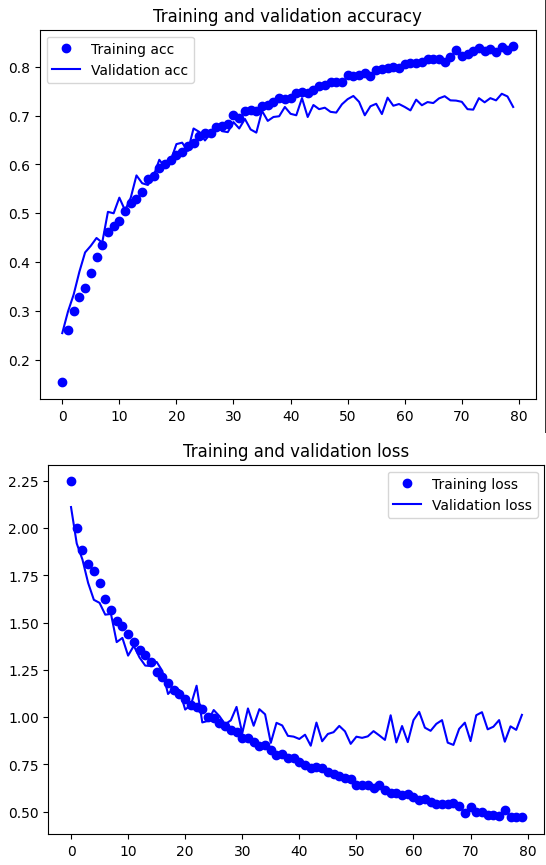

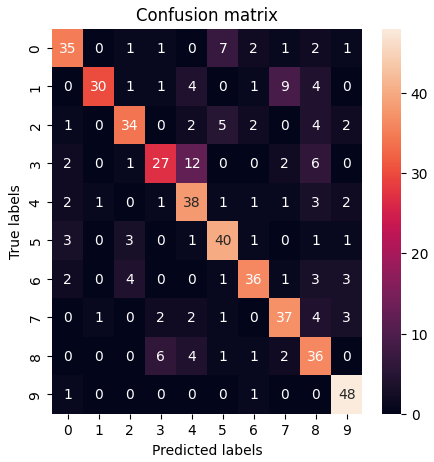

Image: spaghetti bolognese2.jpg
The prediction is: spaghetti_bolognese

Image: spaghetti bolognese1.jpg
The prediction is: spaghetti_bolognese

Image: pancake1.jpg
The prediction is: spaghetti_bolognese

Image: chocolate mousse1.jpg
The prediction is: chocolate_mousse

Image: chocolate mousse2.jpg
The prediction is: chocolate_mousse

Image: beignets1.jpg
The prediction is: beignets

Image: beignets2.jpg
The prediction is: cup_cakes

Image: beetsalad1.jpg
The prediction is: beet_salad

Image: ceviche1.jpg
The prediction is: ceviche

Image: grilled salmon1.jpg
The prediction is: grilled_salmon

Image: beignets3.jpg
The prediction is: beignets

Image: donald trump.jpg
The prediction is: chocolate_mousse

Image: person1.jpg
The prediction is: chocolate_mousse

Image: person2.png
The prediction is: chocolate_mousse



### Trial 7

In [ ]:
### REDUCED THE NUMBER OF CONVOLUTION LAYERS

# Optimizer is Adam
# Learning Rate is 0.0005
# Batch Size = 25

# img_size = 224

# model_7 = models.Sequential()
# model_7.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model_7.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model_7.add(layers.MaxPooling2D((2, 2)))
# model_7.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_7.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_7.add(layers.MaxPooling2D((2, 2)))
# model_7.add(layers.Flatten())
# model_7.add(layers.Dense(10, activation='softmax'))


# Model: "sequential_1"
# _________________________________________________________________
#  Layer (type)                     Output Shape              Param #   
# =================================================================
#  conv2d_4 (Conv2D)                (None, 222, 222, 32)      896                                                                       
#  conv2d_5 (Conv2D)                (None, 220, 220, 32)      9248                                                                      
#  max_pooling2d_2 (MaxPooling2D)   (None, 110, 110, 32)      0                                                                                                                                   
#  conv2d_6 (Conv2D)                (None, 108, 108, 64)      18496                                                                    
#  conv2d_7 (Conv2D)                (None, 106, 106, 64)      36928                                                                     
#  max_pooling2d_3 (MaxPooling2D)   (None, 53, 53, 64)        0                                                                                                                               
#  flatten_1 (Flatten)              (None, 179776)            0                                                                         
#  dense_1 (Dense)                  (None, 10)                1797770   
                                              
# =================================================================
# Total params: 1863338 (7.11 MB)
# Trainable params: 1863338 (7.11 MB)
# Non-trainable params: 0 (0.00 Byte)
# _________________________________________________________________


# Best Validation Loss: 0.9144
# Best Validation Accuracy: 0.7045

# Test Loss: 0.9745248556137085
# Test Accuracy: 0.6740000247955322

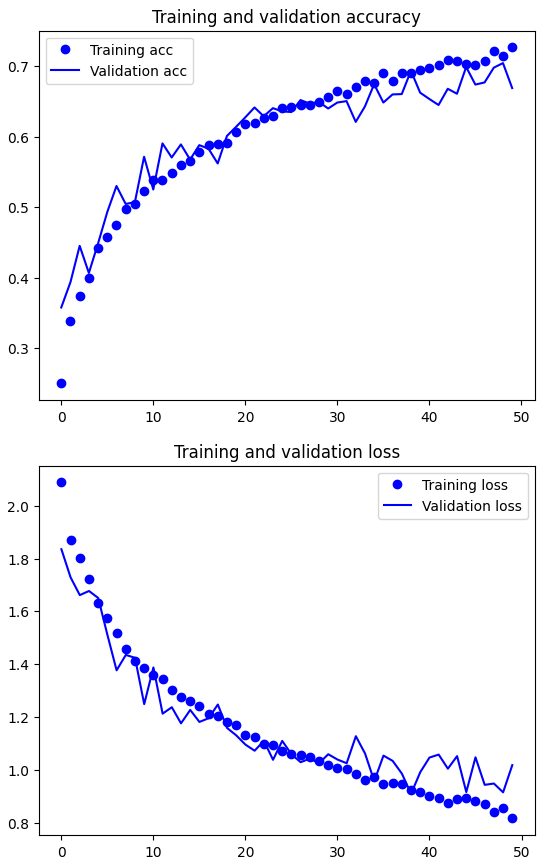

### Trial 8

In [ ]:
### TESTING OUT LEARNING RATE

# Optimizer is Adam
# Learning Rate is 0.001
# Batch Size = 25

# img_size = 224

# model_8 = models.Sequential()
# model_8.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model_8.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model_8.add(layers.MaxPooling2D((2, 2)))
# model_8.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_8.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_8.add(layers.MaxPooling2D((2, 2)))
# model_8.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_8.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_8.add(layers.MaxPooling2D((2, 2)))
# model_8.add(layers.Flatten())
# model_8.add(layers.Dense(10, activation='softmax'))


# Model: "sequential"
# _________________________________________________________________
#  Layer (type)                   Output Shape             Param #
# =================================================================
#  conv2d (Conv2D)                (None, 222, 222, 32)     896
#  conv2d_1 (Conv2D)              (None, 220, 220, 32)     9248
#  max_pooling2d (MaxPooling2D)   (None, 110, 110, 32)     0
#  conv2d_2 (Conv2D)              (None, 108, 108, 64)     18496
#  conv2d_3 (Conv2D)              (None, 106, 106, 64)     36928
#  max_pooling2d_1 (MaxPooling2D) (None, 53, 53, 64)       0
#  conv2d_4 (Conv2D)              (None, 51, 51, 128)      73856
#  conv2d_5 (Conv2D)              (None, 49, 49, 128)      147584
#  max_pooling2d_2 (MaxPooling2D) (None, 24, 24, 128)      0

# =================================================================
# Total params: 1,024,298
# Trainable params: 1,024,298
# Non-trainable params: 0
# _________________________________________________________________


# Best Validation Loss: 1.1648
# Best Validation Accuracy: 0.7015

# Test Loss: 1.0324054956436157
# Test Accuracy: 0.6880000233650208


# Classification Report:
#                      precision    recall  f1-score   support

#          beet_salad       0.90      0.70      0.79        50
#            beignets       0.77      0.82      0.80        50
#             ceviche       0.70      0.52      0.60        50
#    chocolate_mousse       0.56      0.44      0.49        50
#           cup_cakes       0.60      0.70      0.65        50
#         greek_salad       0.80      0.72      0.76        50
#      grilled_salmon       0.59      0.80      0.68        50
#            pancakes       0.61      0.60      0.61        50
#         panna_cotta       0.58      0.58      0.58        50
# spaghetti_bolognese       0.79      0.98      0.87        50

#            accuracy                           0.69       500
#           macro avg       0.69      0.69      0.68       500
#        weighted avg       0.69      0.69      0.68       500

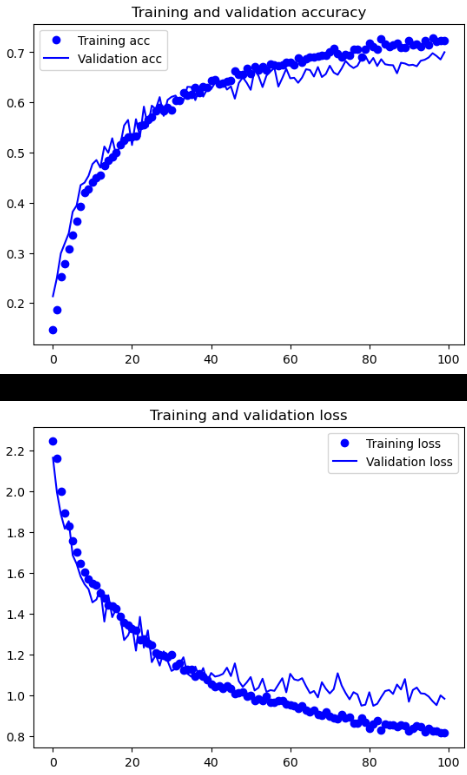

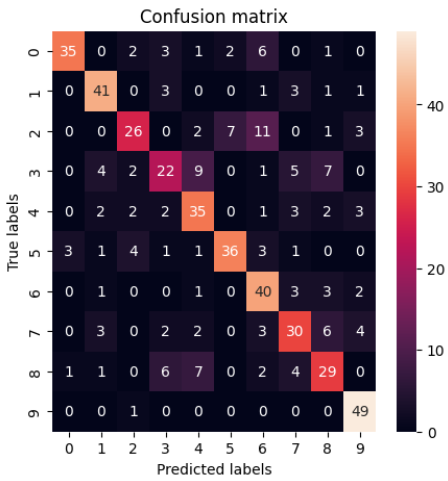

Image: beetsalad1.jpg
The prediction is: beet_salad

Image: beignets1.jpg
The prediction is: beignets

Image: beignets2.jpg
The prediction is: cup_cakes

Image: beignets3.jpg
The prediction is: beignets

Image: ceviche1.jpg
The prediction is: ceviche

Image: chocolate mousse1.jpg
The prediction is: chocolate_mousse

Image: chocolate mousse2.jpg
The prediction is: chocolate_mousse

Image: donald trump.jpg
The prediction is: chocolate_mousse

Image: grilled salmon1.jpg
The prediction is: grilled_salmon

Image: pancake1.jpg
The prediction is: pancakes

Image: person1.jpg
The prediction is: cup_cakes

Image: person2.png
The prediction is: chocolate_mousse

Image: spaghetti bolognese1.jpg
The prediction is: spaghetti_bolognese

Image: spaghetti bolognese2.jpg
The prediction is: spaghetti_bolognese

### Trial 9

In [ ]:
### TESTING OUT LEARNING RATE

# Optimizer is Adam
# Learning Rate is 1e-5
# Batch Size = 25

# img_size = 224

# model_9 = models.Sequential()
# model_9.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
# model_9.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model_9.add(layers.MaxPooling2D((2, 2)))
# model_9.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_9.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model_9.add(layers.MaxPooling2D((2, 2)))
# model_9.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_9.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model_9.add(layers.MaxPooling2D((2, 2)))
# model_9.add(layers.Flatten())
# model_9.add(layers.Dense(10, activation='softmax'))


# Model: "sequential"
# _________________________________________________________________
#  Layer (type)                    Output Shape              Param #
# =================================================================
#  conv2d_6 (Conv2D)               (None, 222, 222, 32)      896
#  conv2d_7 (Conv2D)               (None, 220, 220, 32)      9248
#  max_pooling2d_3 (MaxPooling2D)  (None, 110, 110, 32)      0
#  conv2d_8 (Conv2D)               (None, 108, 108, 64)      18496
#  conv2d_9 (Conv2D)               (None, 106, 106, 64)      36928
#  max_pooling2d_4 (MaxPooling2D)  (None, 53, 53, 64)        0
#  conv2d_10 (Conv2D)              (None, 51, 51, 128)       73856
#  conv2d_11 (Conv2D)              (None, 49, 49, 128)       147584
#  max_pooling2d_5 (MaxPooling2D)  (None, 24, 24, 128)       0
#  flatten_1 (Flatten)             (None, 73728)             0
#  dense_1 (Dense)                 (None, 10)                737290

# =================================================================
# Total params: 1024298 (3.91 MB)
# Trainable params: 1024298 (3.91 MB)
# Non-trainable params: 0 (0.00 Byte)
# _________________________________________________________________


# Best Validation Loss: 1.5841
# Best Validation Accuracy: 0.4630

# Test Loss: 1.55364990234375
# Test Accuracy: 0.4560000002384186

# Classification Report:
#                      precision    recall  f1-score   support

#          beet_salad       0.60      0.62      0.61        50
#            beignets       0.69      0.50      0.58        50
#             ceviche       0.37      0.26      0.31        50
#    chocolate_mousse       0.31      0.20      0.24        50
#           cup_cakes       0.36      0.46      0.40        50
#         greek_salad       0.44      0.68      0.53        50
#      grilled_salmon       0.52      0.28      0.36        50
#            pancakes       0.34      0.44      0.39        50
#         panna_cotta       0.50      0.40      0.44        50
# spaghetti_bolognese       0.56      0.80      0.66        50

#            accuracy                           0.46       500
#           macro avg       0.47      0.46      0.45       500
#        weighted avg       0.47      0.46      0.45       500

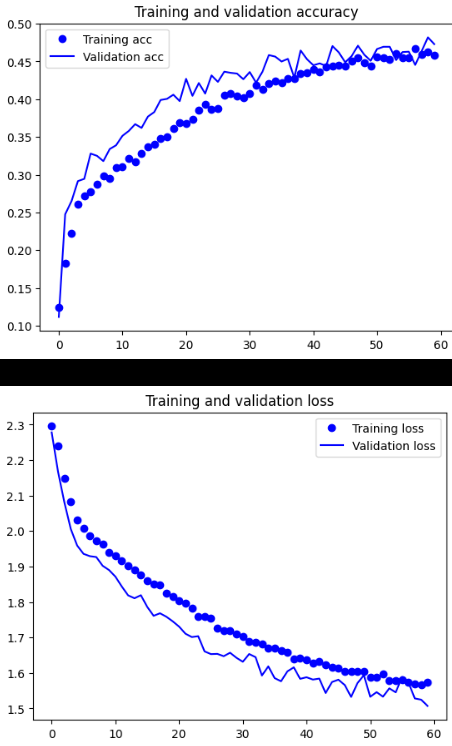

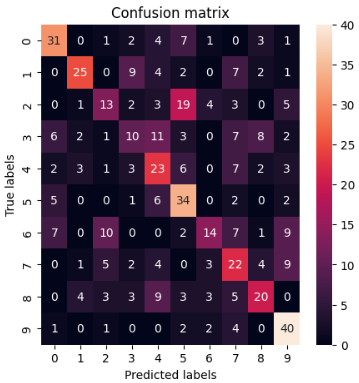

Image: ceviche1.jpg
The prediction is: greek_salad

Image: beignets1.jpg
The prediction is: pancakes

Image: chocolate mousse2.jpg
The prediction is: beignets

Image: beignets3.jpg
The prediction is: panna_cotta

Image: pancake1.jpg
The prediction is: pancakes

Image: spaghetti bolognese1.jpg
The prediction is: spaghetti_bolognese

Image: spaghetti bolognese2.jpg
The prediction is: spaghetti_bolognese

Image: beignets2.jpg
The prediction is: beignets

Image: donald trump.jpg
The prediction is: chocolate_mousse

Image: chocolate mousse1.jpg
The prediction is: pancakes

Image: person1.jpg
The prediction is: chocolate_mousse

Image: beetsalad1.jpg
The prediction is: beet_salad

Image: grilled salmon1.jpg
The prediction is: grilled_salmon

Image: person2.png
The prediction is: chocolate_mousse